In [10]:
import re
import pandas as pd

# Lee el archivo de texto
with open('classical_3classes.txt', 'r') as file:
    text = file.read()

# Define el patrón regex para extraer los datos
pattern = re.compile(
    r"Epoch \d+, Accuracy: (?P<accuracy>\d+\.\d+), Loss: (?P<loss>\d+\.\d+), Validation Accuracy: (?P<val_accuracy>\d+\.\d+), Validation Loss: (?P<val_loss>\d+\.\d+)"
)

# Encuentra todos los matches en el texto
matches = pattern.findall(text)

# Convierte los datos extraídos a un DataFrame
data = {
    "Accuracy": [float(match[0]) for match in matches],
    "Loss": [float(match[1]) for match in matches],
    "Validation Accuracy": [float(match[2]) for match in matches],
    "Validation Loss": [float(match[3]) for match in matches]
}

df = pd.DataFrame(data)



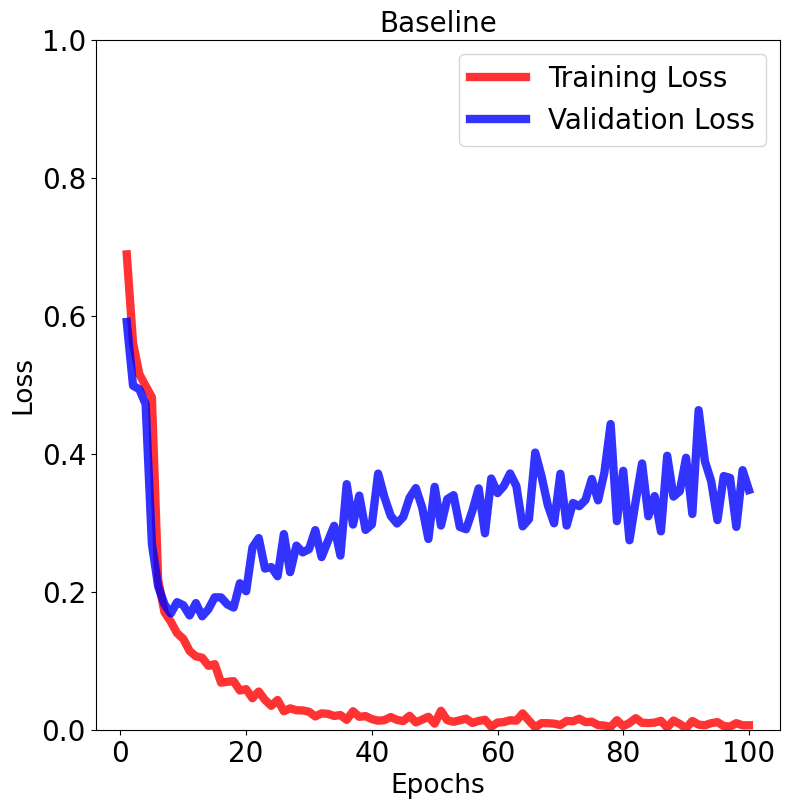

In [11]:
import matplotlib.pyplot as plt

# Configuración de estilo
lw = 6
s = 20  # Tamaño de los títulos y leyenda
a = 0.8
ct = "red"
ca = "blue"

# Crear una figura con un solo subplot
fig, ax1 = plt.subplots(figsize=(8, 8))

# Gráfico de Pérdida
ax1.plot(df.index + 1, df['Loss'], label='Training Loss', linewidth=lw, color=ct, alpha=a)
ax1.plot(df.index + 1, df['Validation Loss'], label='Validation Loss', linewidth=lw, color=ca, alpha=a)
ax1.set_xlabel('Epochs', fontsize=s-1)
ax1.set_ylabel('Loss', fontsize=s-1)
ax1.legend(fontsize=s)
ax1.set_ylim(bottom=0, top=1)

# Hacer los números en los ejes más grandes
ax1.tick_params(axis='both', which='major', labelsize=s)

# Ajustar el layout y guardar la imagen
plt.tight_layout()
plt.title('Baseline', fontsize=s)
plt.savefig('classical_model_3classes.png')
plt.show()

In [17]:
import re
import pandas as pd

# Read the text file
with open('results_senokosov3class.txt', 'r') as file:
    text = file.read()

# Define the regex pattern to extract the data
pattern = re.compile(
    r"Epoch \[\d+/\d+\] Train Loss: (?P<train_loss>\d+\.\d+) Train Acc: (?P<train_accuracy>\d+\.\d+)% Val Loss: (?P<val_loss>\d+\.\d+) Val Acc: (?P<val_accuracy>\d+\.\d+)%"
)

# Find all matches in the text
matches = pattern.findall(text)

# Convert the extracted data to a DataFrame
data = {
    "Train Loss": [float(match[0]) for match in matches],
    "Train Accuracy": [float(match[1]) for match in matches],
    "Validation Loss": [float(match[2]) for match in matches],
    "Validation Accuracy": [float(match[3]) for match in matches]
}

df = pd.DataFrame(data)


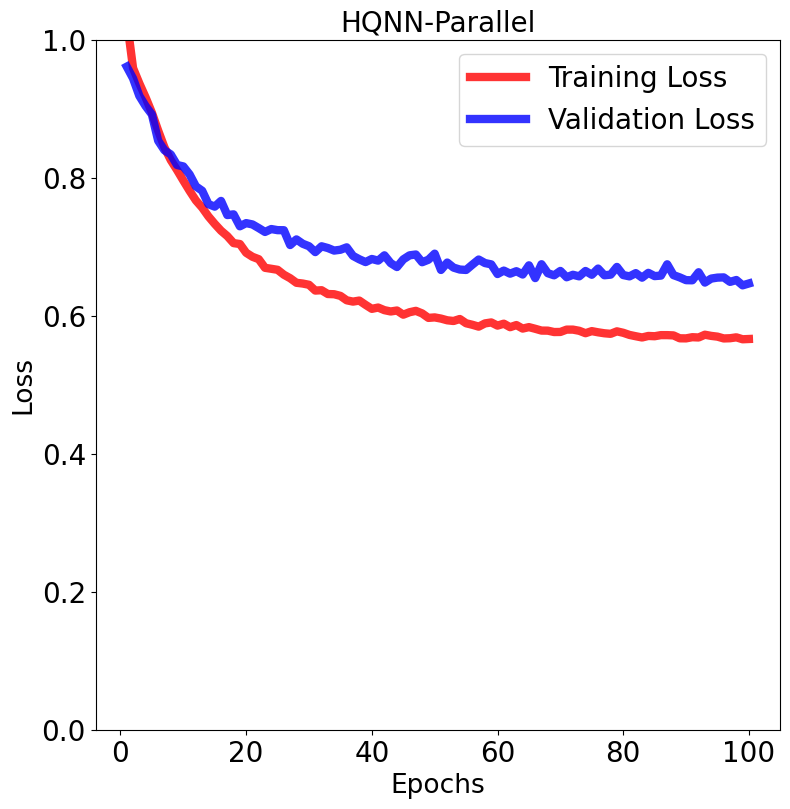

In [18]:
import matplotlib.pyplot as plt

# Configuración de estilo
lw = 6
s = 20  # Tamaño de los títulos y leyenda
a = 0.8
ct = "red"
ca = "blue"

# Crear una figura con un solo subplot
fig, ax1 = plt.subplots(figsize=(8, 8))

# Gráfico de Pérdida
ax1.plot(df.index + 1, df['Train Loss'], label='Training Loss', linewidth=lw, color=ct, alpha=a)
ax1.plot(df.index + 1, df['Validation Loss'], label='Validation Loss', linewidth=lw, color=ca, alpha=a)
ax1.set_xlabel('Epochs', fontsize=s-1)
ax1.set_ylabel('Loss', fontsize=s-1)
ax1.legend(fontsize=s)
ax1.set_ylim(bottom=0, top=1)

# Hacer los números en los ejes más grandes
ax1.tick_params(axis='both', which='major', labelsize=s)

# Ajustar el layout y guardar la imagen
plt.tight_layout()
plt.title('HQNN-Parallel', fontsize=s)
plt.savefig('senokosov_3class.png')
plt.show()

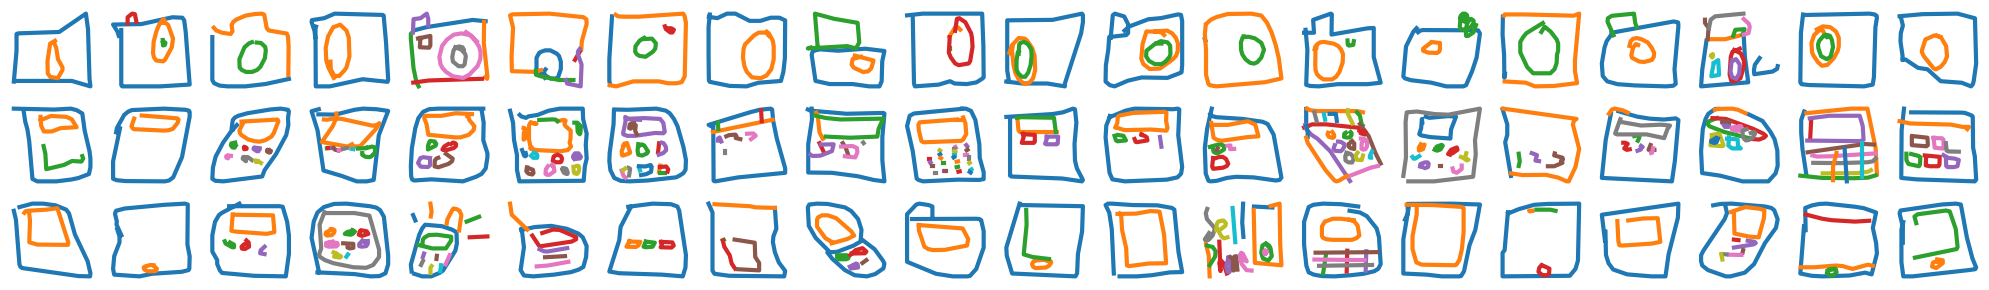

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

# Función para cargar datos desde un archivo ndjson
def load_quickdraw_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    return pd.DataFrame(data)

# Cargar datos de cada archivo
data1 = load_quickdraw_data('../data/quickdraw/full_simplified_camera.ndjson')
data2 = load_quickdraw_data('../data/quickdraw/full_simplified_calculator.ndjson')
data3 = load_quickdraw_data('../data/quickdraw/full_simplified_cell phone.ndjson')

# Función para dibujar un sketch
def draw_sketch(drawing, ax):
    for stroke in drawing:
        ax.plot(stroke[0], -np.array(stroke[1]), linewidth=3)  # Dibuja cada trazo
    ax.axis('off')  # Oculta los ejes

# Configuración de la figura con múltiples subplots
fig, axs = plt.subplots(3, 20, figsize=(20, 3))  # 3 filas, 20 columnas

# Visualización de 20 dibujos aleatorios para cada archivo
datasets = [data1, data2, data3]
for i, data in enumerate(datasets):
    for j in range(20):
        index = np.random.randint(len(data))  # Selección aleatoria de un dibujo
        drawing = data.iloc[index]['drawing']
        draw_sketch(drawing, axs[i, j])

plt.tight_layout() # Ajusta la disposición para evitar superposiciones
plt.savefig('quickdraw_samples.png')
plt.show()